# Analyse des Correspondances Multiples (ACM)

In [1]:
# Chargement des données
import pandas as pd
# Données actives
A = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=0,index_col=0)
# Individus supplémentaires
B = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=1,index_col=0)
# Variables qualitative supplémentaires
C = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=2,index_col=0)
# Variables quantitatives supplémentaires
D = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=3,index_col=0)
C.index = D.index = A.index
# Concaténation
Data = pd.concat([pd.concat([A,B],axis=0),C,D],axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Beauceron to Wisky
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Taille        33 non-null     object 
 1   Poids         33 non-null     object 
 2   Velocite      33 non-null     object 
 3   Intelligence  33 non-null     object 
 4   Affection     33 non-null     object 
 5   Agressivite   33 non-null     object 
 6   Fonction      27 non-null     object 
 7   Cote          27 non-null     float64
dtypes: float64(1), object(7)
memory usage: 2.3+ KB


In [2]:
from scientisttools.decomposition import MCA

In [3]:
# ACM avec les éléments supplémentaires
my_mca = MCA(n_components=None,
             row_labels=A.index,
             var_labels=A.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=B.index,
             quali_sup_labels=["Fonction"],
             quanti_sup_labels=["Cote"],
             parallelize=False)
# Estimation
my_mca.fit(Data)

MCA(quali_sup_labels=['Fonction'], quanti_sup_labels=['Cote'],
    row_labels=Index(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog', 'Bull-Mastif',
       'Caniche', 'Chihuahua', 'Cocker', 'Colley', 'Dalmatien', 'Doberman',
       'Dogue All', 'Epag. Breton', 'Epag. Français', 'Fox-Hound',
       'Fox-Terrier', 'Gd Bleu Gasc', 'Labrador', 'Levrier', 'Mastiff',
       'Pekinois', 'Pointer', 'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'],
      dtype='object', name='Chien'),
    row_sup_labels=Index(['Medor', 'Djeck', 'Taico', 'Rocky', 'Boudog', 'Wisky'], dtype='object', name='Chien'),
    var_labels=Index(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite'],
      dtype='object'))

In [4]:
from scientisttools.extractfactor import summaryMCA
summaryMCA(my_mca)

                     Multiple Correspondance Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6  \
Variance                  0.482   0.385   0.211   0.158   0.150   0.123   
Difference                0.097   0.174   0.053   0.007   0.027   0.042   
% of var.                28.896  23.084  12.657   9.453   9.008   7.398   
Cumulative of % of var.  28.896  51.981  64.638  74.091  83.099  90.497   

                          Dim.7   Dim.8   Dim.9   Dim.10  
Variance                  0.081   0.046   0.024    0.008  
Difference                0.036   0.022   0.016    0.008  
% of var.                 4.888   2.740   1.413    0.463  
Cumulative of % of var.  95.385  98.125  99.537  100.000  

Individuals (the 10 first)

             d(i,G)   p(i)  I(i,G)  Dim.1    ctr   cos2  Dim.2     ctr   cos2  \
Chien                                                                           
Beauceron     1.065  0.037 

In [5]:
# Extract eigenvalues/variances
from scientisttools.extractfactor import get_eig
get_eig(my_mca)

,eigenvalue,difference,proportion,cumulative
Dim.1,0.481606,0.096869,28.896370,28.896370
Dim.2,0.384737,0.173783,23.084237,51.980607
Dim.3,0.210954,0.053400,12.657243,64.637850
Dim.4,0.157554,0.007421,9.453242,74.091092
Dim.5,0.150133,0.026837,9.007960,83.099052
Dim.6,0.123295,0.041833,7.397718,90.496770
Dim.7,0.081462,0.035793,4.887748,95.384518
Dim.8,0.045670,0.022128,2.740185,98.124703
Dim.9,0.023542,0.015829,1.412515,99.537218
Dim.10,0.007713,0.007713,0.462782,100.000000


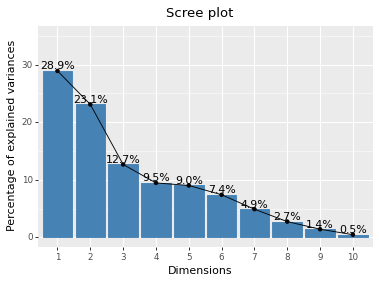

In [6]:
# Visualize eigenvalues/variances
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(my_mca,add_labels=True,ylim=(0,35))
print(p)

# Extract and visualize results for modalities

In [7]:
# Extract the results for categories
from scientisttools.extractfactor import get_mca_mod
mod = get_mca_mod(my_mca)
print(mod.keys())

dict_keys(['coord', 'corrected_coord', 'cos2', 'contrib', 'vtest', 'infos', 'sup'])


In [8]:
# Coordinates of categories
mod["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille_Taille+,0.851088,-1.231720,1.016052,0.342456,-0.310040,0.118297,0.858306,-0.259599,0.307322,0.015208
Taille_Taille++,-0.836675,-0.020578,-0.051217,-0.170222,0.112663,-0.049965,-0.117844,0.056414,-0.144633,-0.121550
Taille_Taille-,1.184956,0.923897,-0.616000,0.120149,-0.019963,0.022569,-0.360553,0.064541,0.090411,0.249601
Poids_Poids+,-0.305405,-0.818876,-0.231272,-0.118364,-0.190201,0.012908,0.037178,-0.125673,-0.184946,0.097573
Poids_Poids++,-1.015134,0.973901,1.221595,0.067605,0.614518,0.289232,0.067864,0.641508,0.204009,0.071494
Poids_Poids-,1.168918,0.824345,-0.358770,0.164884,-0.051221,-0.203360,-0.107475,-0.181014,0.196151,-0.215436


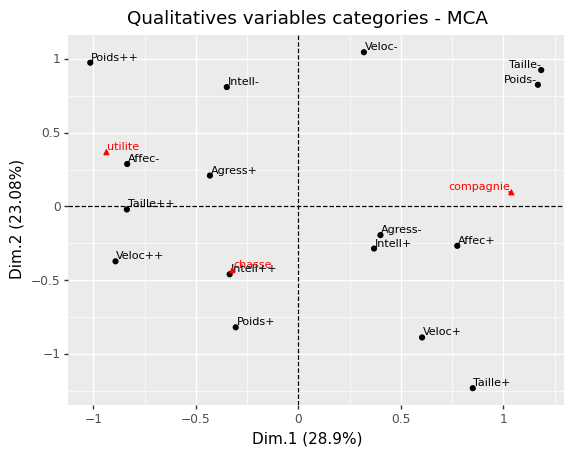

In [9]:
# Graph of modalities: default plot
from scientisttools.ggplot import fviz_mca_mod
p = fviz_mca_mod(my_mca,color = "black",repel=True)
print(p)

In [10]:
# Corrected coordinates of categories
mod["corrected_coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille_Taille+,0.590637,-0.764001,0.466670,0.135931,-0.120131,0.041538,0.244974,-0.055478,0.047154,0.001336
Taille_Taille++,-0.580635,-0.012764,-0.023524,-0.067566,0.043653,-0.017544,-0.033635,0.012056,-0.022192,-0.010675
Taille_Taille-,0.822334,0.573067,-0.282927,0.047691,-0.007735,0.007925,-0.102908,0.013793,0.013872,0.021921
Poids_Poids+,-0.211945,-0.507926,-0.106223,-0.046982,-0.073697,0.004533,0.010611,-0.026857,-0.028377,0.008569
Poids_Poids++,-0.704481,0.604083,0.561075,0.026834,0.238107,0.101559,0.019369,0.137093,0.031302,0.006279
Poids_Poids-,0.811204,0.511318,-0.164782,0.065447,-0.019847,-0.071407,-0.030675,-0.038684,0.030096,-0.018920


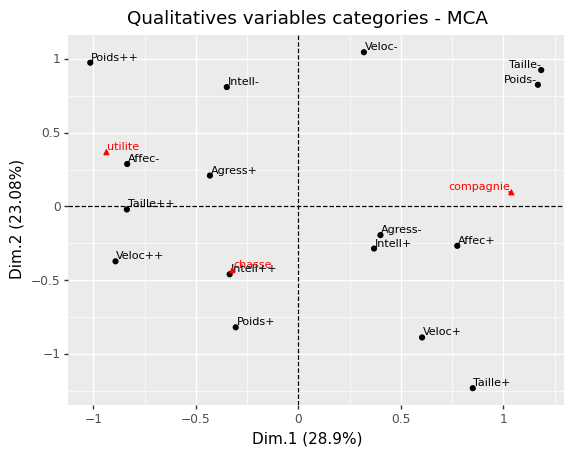

In [11]:
# Graph of modalities: default plot with corrected coordinates
p = fviz_mca_mod(my_mca,color="black",corrected=True,repel=True)
print(p)

It's possible to control variable colors using their contributions ("contrib") to the principal axes

In [12]:
# Contribution of modalities
mod["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille_Taille+,4.642073,12.170670,15.104237,2.297396,1.976132,0.350313,27.911402,4.554429,12.382277,0.092552
Taille_Taille++,13.458546,0.010191,0.115139,1.702852,0.782824,0.187481,1.578462,0.645240,8.227491,17.736217
Taille_Taille-,12.597815,9.586617,7.772416,0.395909,0.011470,0.017851,6.895454,0.394118,1.500336,34.902087
Poids_Poids+,1.673686,15.062072,2.191147,0.768462,2.082406,0.011679,0.146628,2.988621,12.556330,10.667116
Poids_Poids++,6.604042,7.608867,21.833395,0.089533,7.763356,2.094114,0.174490,27.811882,5.456456,2.045345
Poids_Poids-,14.010416,8.722246,3.013148,0.852122,0.086298,1.656371,0.700222,3.542998,8.070727,29.715822


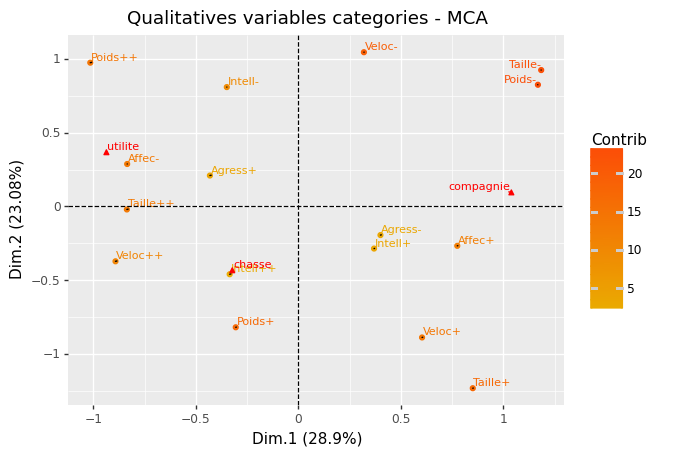

In [13]:
p = fviz_mca_mod(my_mca,
                 color="contrib",
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel=True)
print(p)

Modalities contributions to the principal axes

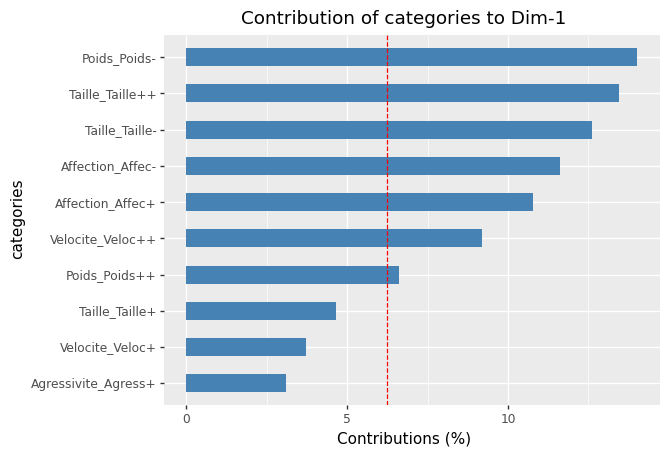

In [14]:
# Contributions of variables to PC1
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(my_mca,choice="mod",axis=0,top_contrib=10)
print(p)

In [15]:
mod["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille_Taille+,0.164625,0.344803,0.234628,0.026654,0.021847,0.003181,0.167429,0.015316,0.021465,0.000053
Taille_Taille++,0.875032,0.000529,0.003279,0.036219,0.015866,0.003121,0.017359,0.003978,0.026148,0.018468
Taille_Taille-,0.491442,0.298755,0.132809,0.005053,0.000139,0.000178,0.045499,0.001458,0.002861,0.021805
Poids_Poids+,0.100447,0.722139,0.057601,0.015088,0.038959,0.000179,0.001488,0.017009,0.036836,0.010253
Poids_Poids++,0.234204,0.215564,0.339158,0.001039,0.085826,0.019013,0.001047,0.093530,0.009459,0.001162
Poids_Poids-,0.575313,0.286124,0.054196,0.011447,0.001105,0.017413,0.004864,0.013796,0.016200,0.019542


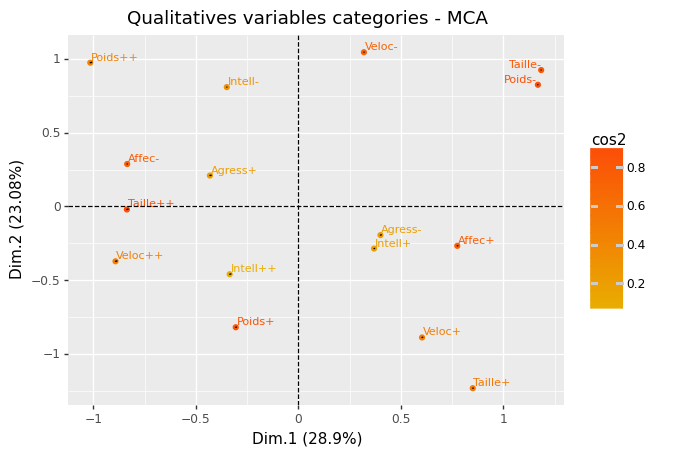

In [16]:
p = fviz_mca_mod(my_mca,
                 color="cos2",
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 quali_sup=False,
                 repel=True)
print(p)

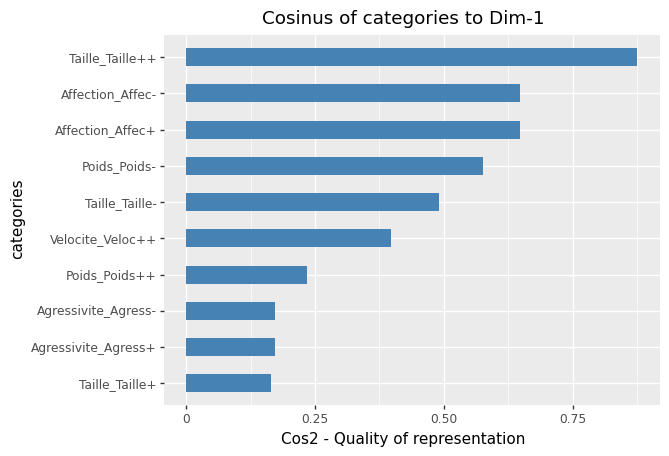

In [17]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(my_mca,choice="mod",axis=0)
print(p)

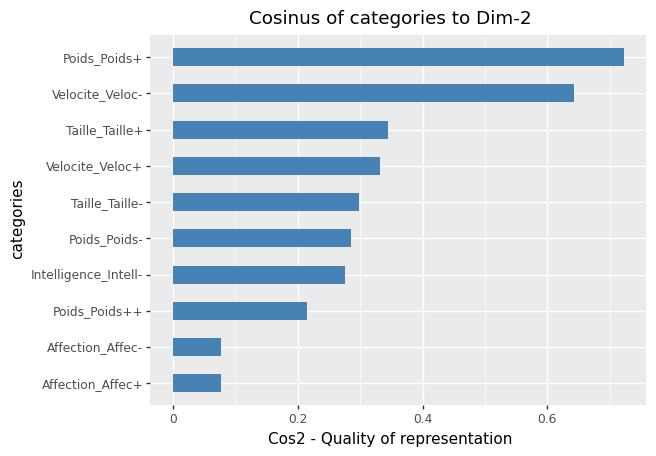

In [18]:
p = fviz_cosines(my_mca,choice="mod",axis=1)
print(p)

In [19]:
import numpy as np
np.random.seed(123)
my_cont_var = np.random.normal(size=len(my_mca.mod_labels_))
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128]


d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:690: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:694: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:704: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


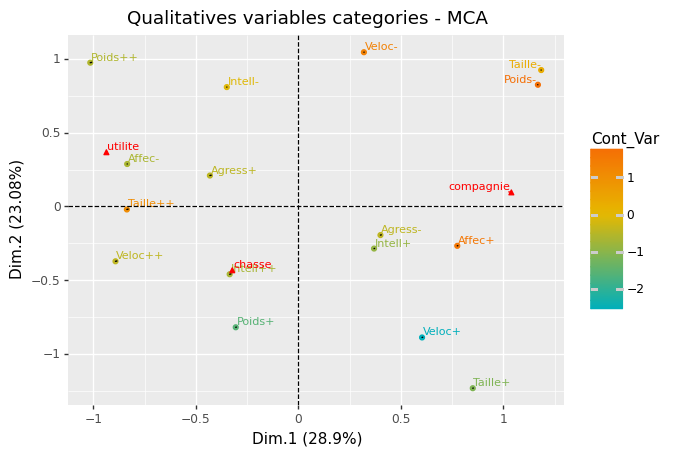

In [20]:
p = fviz_mca_mod(my_mca,
                 color=my_cont_var,
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel=True)
print(p)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=np.random.seed(123), n_init="auto").fit(mod["coord"])
kmeans.labels_

array([3, 0, 1, 0, 0, 1, 3, 0, 1, 0, 2, 0, 1, 0, 0, 1])

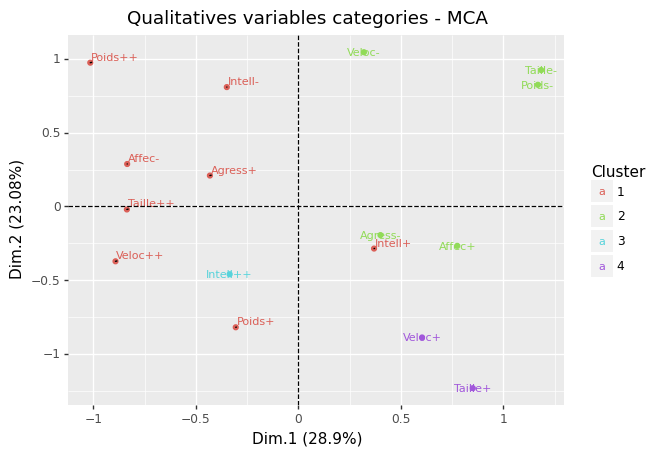

In [22]:
p = fviz_mca_mod(my_mca,
                 color=kmeans,
                 gradient_cols =["blue", "yellow", "red"],
                 quali_sup=False,
                 repel=True)
print(p)

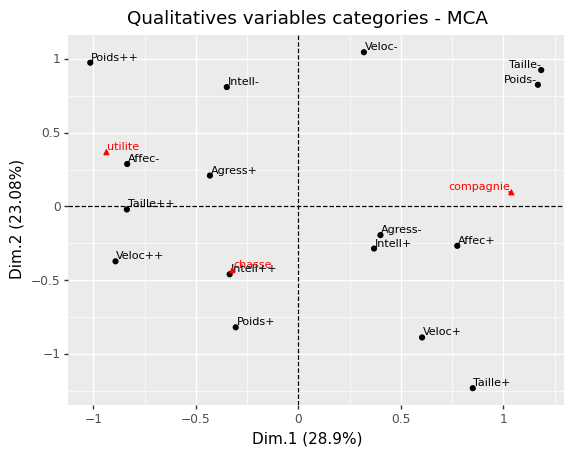

In [23]:
p = fviz_mca_mod(my_mca,
                 color="black",
                 gradient_cols =["blue", "yellow", "red"],
                 quali_sup=True,
                 repel=True)
print(p)

### Individuals

In [24]:
from scientisttools.extractfactor import get_mca_ind
row = get_mca_ind(my_mca)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos', 'ind_sup'])

In [25]:
# Coordinates
row["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Chien,,,,,,,,,,
Beauceron,-0.317200,-0.417701,-0.101468,-0.211436,-0.118510,-0.844917,-0.089050,0.201986,-0.167019,0.022807
Basset,0.254110,1.101227,-0.190701,0.292637,-0.524009,0.039895,-0.052833,-0.447363,0.100738,0.147102
Berger All,-0.486396,-0.464450,-0.498134,0.577425,0.275902,-0.567765,0.129097,0.187330,-0.234185,-0.008920
Boxer,0.447365,-0.881778,0.692016,0.260002,-0.455590,-0.213746,0.003008,-0.019819,-0.002446,0.140901
Bull-Dog,1.013352,0.549879,-0.163423,-0.349919,0.330786,-0.201414,-0.063544,-0.079036,-0.035602,0.066543
Bull-Mastif,-0.752574,0.546912,0.497573,0.655153,0.721946,0.117926,0.018594,-0.037325,-0.112103,0.024573


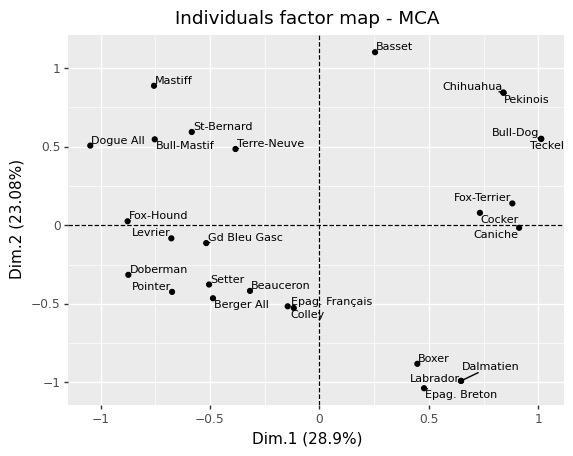

In [26]:
from scientisttools.ggplot import fviz_mca_ind
p = fviz_mca_ind(my_mca,
                 color="black",
                 ind_sup=False,
                 repel=True)
print(p)

In [27]:
# Contrib
row["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Chien,,,,,,,,,,
Beauceron,0.773768,1.679591,0.180761,1.050911,0.346472,21.444606,0.360536,3.308658,4.388594,0.249768
Basset,0.496578,11.674160,0.638490,2.013103,6.773884,0.047810,0.126909,16.230336,1.596557,10.390807
Berger All,1.819380,2.076582,4.356528,7.837874,1.877893,9.683373,0.757722,2.845927,8.628051,0.038206
Boxer,1.539104,7.484976,8.407762,1.589130,5.120461,1.372414,0.000411,0.031855,0.000941,9.533202
Bull-Dog,7.897052,2.910764,0.468895,2.878342,2.699333,1.218624,0.183582,0.506587,0.199413,2.126273
Bull-Mastif,4.355552,2.879430,4.346724,10.090014,12.857925,0.417741,0.015720,0.112982,1.977088,0.289960


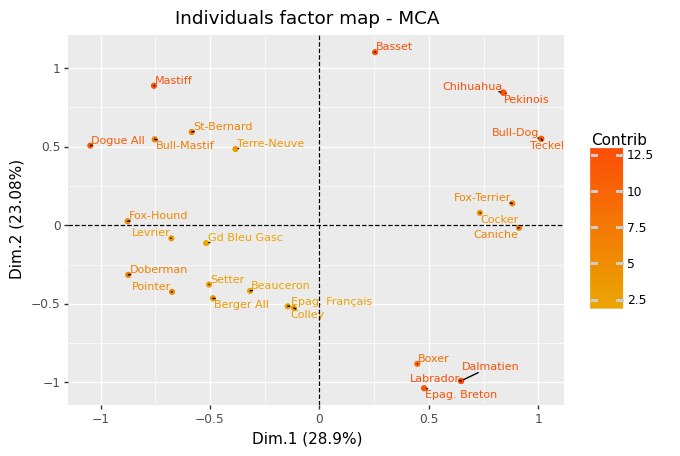

In [28]:
p = fviz_mca_ind(my_mca,
                 color="contrib",
                 ind_sup=False,
                 repel=True)
print(p)

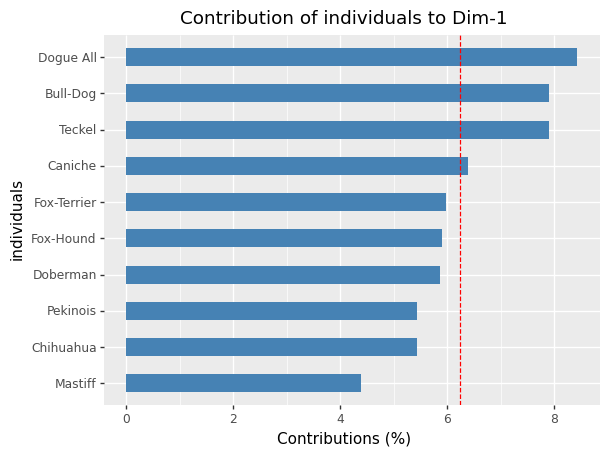

In [29]:
p = fviz_contrib(my_mca,choice="ind",axis=0,top_contrib=10)
print(p)

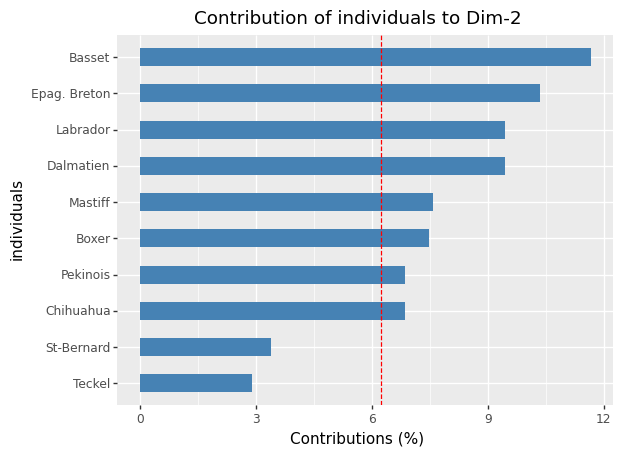

In [30]:
p = fviz_contrib(my_mca,choice="ind",axis=1,top_contrib=10)
print(p)

In [31]:
row["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Chien,,,,,,,,,,
Beauceron,0.088635,0.153700,0.009070,0.039382,0.012372,0.628882,0.006986,0.035941,0.024574,0.000458
Basset,0.033804,0.634867,0.019039,0.044832,0.143749,0.000833,0.001461,0.104773,0.005313,0.011328
Berger All,0.153722,0.140164,0.161232,0.216646,0.049462,0.209457,0.010829,0.022802,0.035635,0.000052
Boxer,0.111331,0.432524,0.266393,0.037605,0.115462,0.025415,0.000005,0.000219,0.000003,0.011044
Bull-Dog,0.624485,0.183881,0.016242,0.074462,0.066542,0.024671,0.002456,0.003799,0.000771,0.002693
Bull-Mastif,0.270691,0.142958,0.118328,0.205144,0.249106,0.006646,0.000165,0.000666,0.006006,0.000289


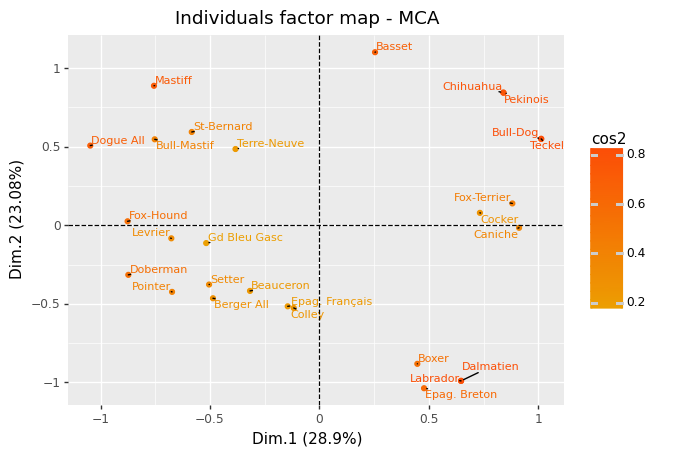

In [32]:
p = fviz_mca_ind(my_mca,
                 color="cos2",
                 ind_sup=False,
                 repel=True)
print(p)

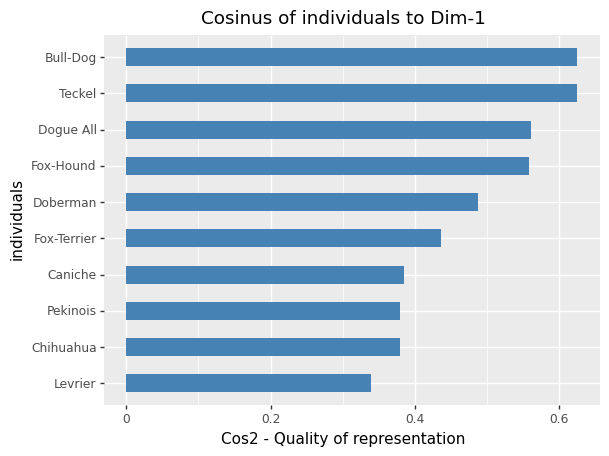

In [33]:
p = fviz_cosines(my_mca,choice="ind",axis=0)
print(p)

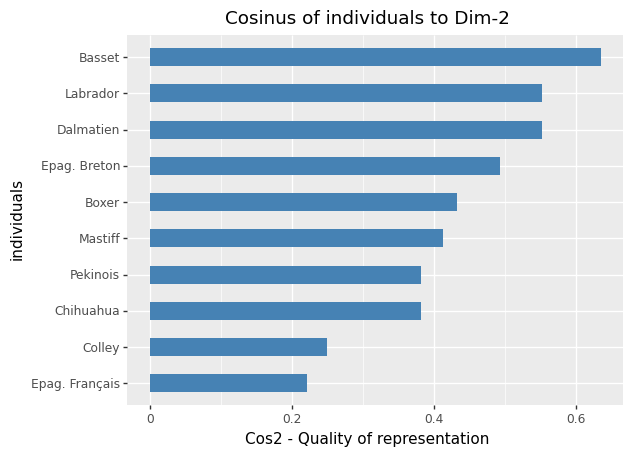

In [34]:
p = fviz_cosines(my_mca,choice="ind",axis=1)
print(p)

In [35]:
np.random.seed(123)
my_cont_var = np.random.normal(size=len(my_mca.row_labels_))
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609
  1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387  1.17582904
 -1.25388067 -0.6377515   0.9071052 ]


d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:520: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:524: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:538: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


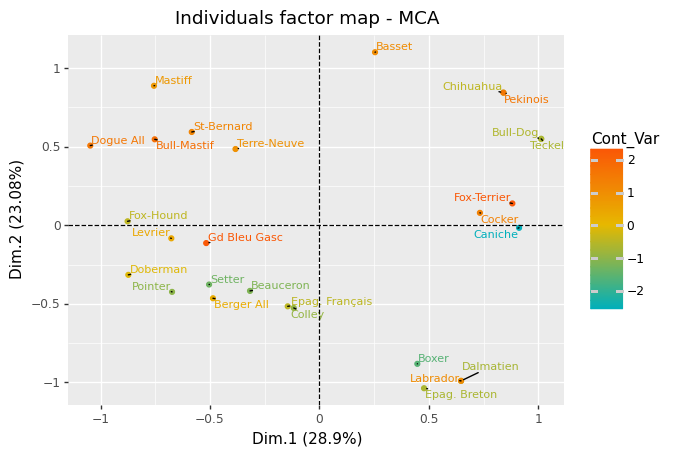

In [36]:
p = fviz_mca_ind(my_mca,
                 color=my_cont_var,
                 ind_sup=False,
                 repel=True)
print(p)

In [37]:
kmeans = KMeans(n_clusters=4, random_state=np.random.seed(123), n_init="auto").fit(row["coord"])
kmeans.labels_

array([3, 1, 3, 0, 1, 3, 1, 1, 1, 2, 0, 3, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1,
       3, 2, 2, 1, 2])

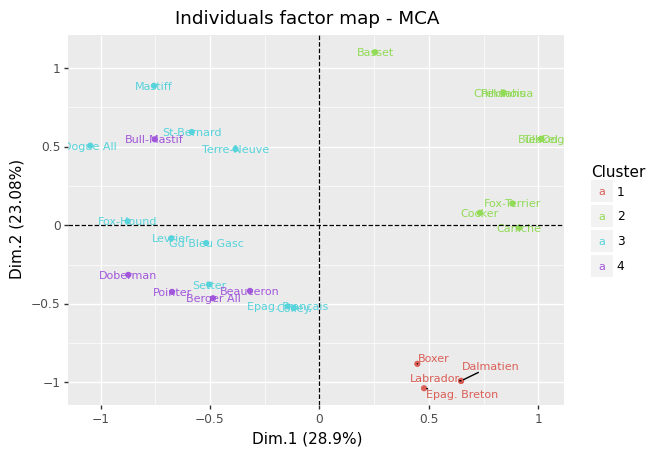

In [38]:
p = fviz_mca_ind(my_mca,
                 color=kmeans,
                 ind_sup=False,
                 repel=True)
print(p)

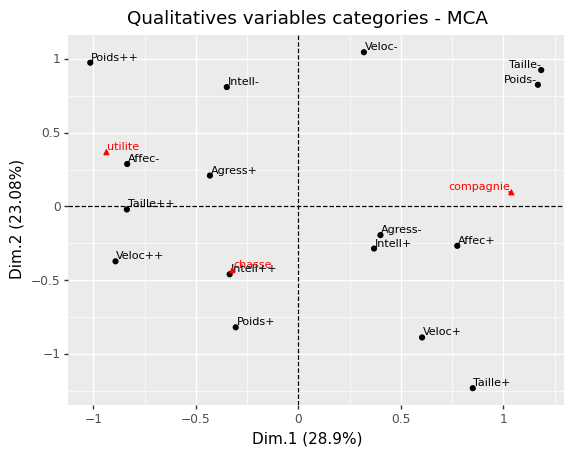

In [39]:
p = fviz_mca_mod(my_mca,color="black",repel=True)
print(p)

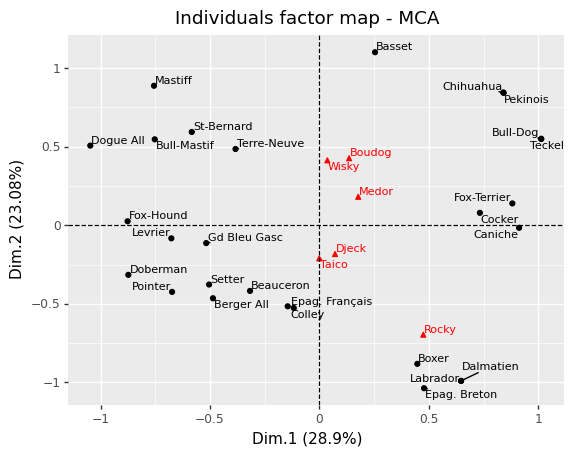

In [40]:
p = fviz_mca_ind(my_mca,color="black",repel=True)
print(p)

In [41]:
from scientisttools.extractfactor import get_mca_var
var = get_mca_var(my_mca)
var.keys()

dict_keys(['chi2', 'inertia', 'eta2', 'cos2', 'contrib', 'quanti_sup'])

In [42]:
var["eta2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille,0.887073,0.502486,0.291013,0.041558,0.024956,0.004111,0.177842,0.015328,0.031231,0.024403
Poids,0.644046,0.724688,0.342223,0.016166,0.089468,0.027831,0.004992,0.094108,0.036843,0.019635
Velocite,0.411174,0.684007,0.291491,0.062182,0.075484,0.211971,0.168032,0.041906,0.052533,0.001220
Intelligence,0.126764,0.279870,0.233710,0.536922,0.578931,0.141342,0.084598,0.015911,0.001709,0.000244
Affection,0.647656,0.076736,0.003981,0.006421,0.001751,0.108949,0.031335,0.104507,0.018264,0.000402
Agressivite,0.172924,0.040637,0.103308,0.282075,0.130207,0.245568,0.021976,0.002259,0.000672,0.000374


In [43]:
var["cos2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille,0.443537,0.251243,0.145506,0.020779,0.012478,0.002055,0.088921,0.007664,0.015615,0.012201
Poids,0.322023,0.362344,0.171111,0.008083,0.044734,0.013916,0.002496,0.047054,0.018422,0.009818
Velocite,0.205587,0.342004,0.145745,0.031091,0.037742,0.105986,0.084016,0.020953,0.026266,0.000610
Intelligence,0.063382,0.139935,0.116855,0.268461,0.289465,0.070671,0.042299,0.007955,0.000855,0.000122
Affection,0.647656,0.076736,0.003981,0.006421,0.001751,0.108949,0.031335,0.104507,0.018264,0.000402
Agressivite,0.172924,0.040637,0.103308,0.282075,0.130207,0.245568,0.021976,0.002259,0.000672,0.000374


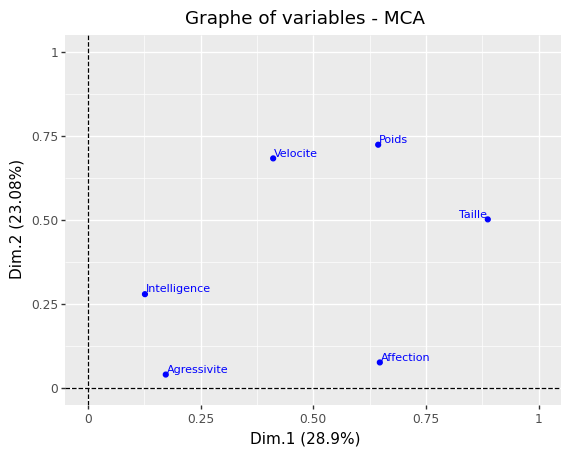

In [44]:
from scientisttools.ggplot import fviz_mca_var
p = fviz_mca_var(my_mca,repel=True)
print(p)

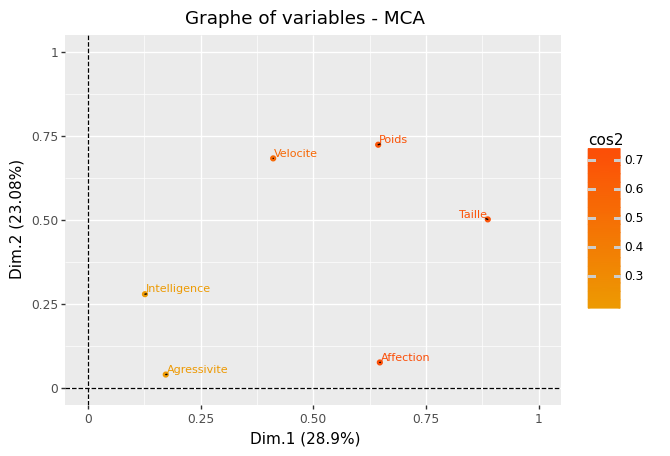

In [45]:
p = fviz_mca_var(my_mca,
                 color="cos2",
                 repel=True)
print(p)

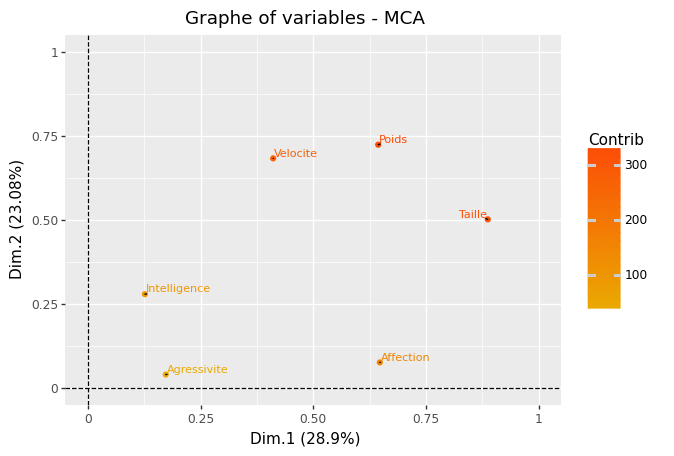

In [46]:
p = fviz_mca_var(my_mca,
                 color="contrib",
                 repel=True)
print(p)

In [47]:
np.random.seed(123)
my_cont_var = np.random.uniform(low=0,high=1,size=6)
print(my_cont_var)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]


d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:825: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:829: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


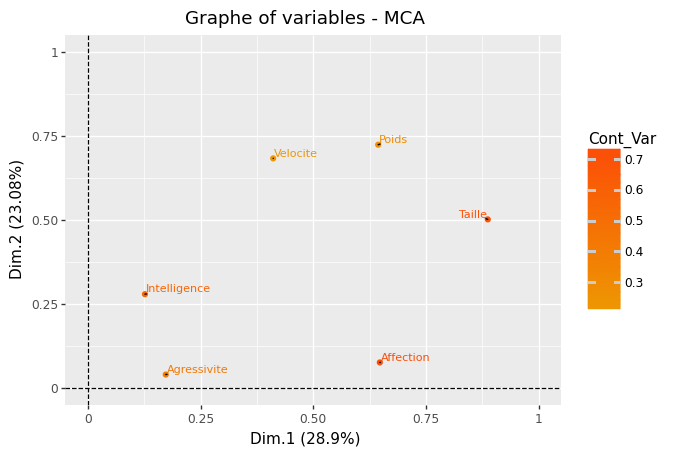

In [48]:
p = fviz_mca_var(my_mca,
                 color=my_cont_var,
                 repel=True)
print(p)

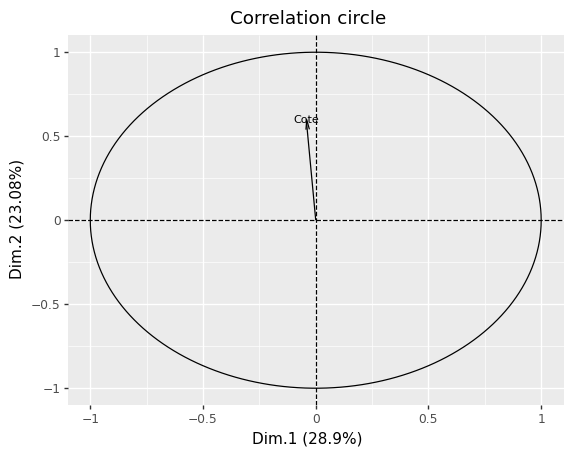

In [49]:
from scientisttools.ggplot import fviz_corrcircle
p = fviz_corrcircle(my_mca,text_size=8,add_labels=True)
print(p)

In [50]:
from scientisttools.extractfactor import dimdesc
d = dimdesc(my_mca,axis=0)
d["Dim.1"]

,Sum. Intra,Sum. Inter,R2,F-stats,pvalue
Taille,1.468427,11.534939,0.887073,94.263625,0.000000e+00
Fonction,3.971435,9.031931,0.694584,27.290680,6.600000e-07
Affection,4.581660,8.421706,0.647656,45.953357,4.200000e-07
Poids,4.628594,8.374772,0.644046,21.712265,4.140000e-06
Velocite,7.656719,5.346647,0.411174,8.379538,1.737170e-03
Agressivite,10.754775,2.248591,0.172924,5.226960,3.098130e-02


In [51]:
d = dimdesc(my_mca,axis=[0,1])
d["Dim.1"]

,Sum. Intra,Sum. Inter,R2,F-stats,pvalue
Taille,1.468427,11.534939,0.887073,94.263625,0.000000e+00
Fonction,3.971435,9.031931,0.694584,27.290680,6.600000e-07
Affection,4.581660,8.421706,0.647656,45.953357,4.200000e-07
Poids,4.628594,8.374772,0.644046,21.712265,4.140000e-06
Velocite,7.656719,5.346647,0.411174,8.379538,1.737170e-03
Agressivite,10.754775,2.248591,0.172924,5.226960,3.098130e-02


In [52]:
d["Dim.2"]["quali"]

,Sum. Intra,Sum. Inter,R2,F-stats,pvalue
Poids,2.859918,7.527989,0.724688,31.586870,1.900000e-07
Velocite,3.282502,7.105405,0.684007,25.975569,9.900000e-07
Taille,5.168133,5.219774,0.502486,12.119907,2.299700e-04
Intelligence,7.480643,2.907264,0.279870,4.663660,1.945048e-02


In [53]:
d["Dim.2"]["quanti"]

,statistic,pvalue
Cote,0.601291,0.000909
